In [1]:
# Imports
import pandas as pd
import numpy as np

In [2]:
# Load Data
weather_2015_2017 = pd.read_csv('cleaned_weather_2015_2017.csv', index_col=0)

In [3]:
weather_2015_2017.head()

,dew_point,air_temp,air_pressure,wind_dir,wind_speed,cumulative_snow_hours,cumulative_rain_hours,year,month,day,hour
0,-20.4,-7.2,1034.9,340.0,1.0,0,0.0,2015,1,1,0
1,-22.0,-5.0,1016.6,20.0,2.0,0,10.0,2015,1,1,1
2,-22.0,-3.0,1016.6,30.0,3.0,0,10.0,2015,1,1,2
3,-22.5,-1.2,1034.0,180.0,3.0,0,71.0,2015,1,1,3
4,-22.0,0.0,1016.6,180.0,2.0,0,10.0,2015,1,1,4


In [4]:
len(weather_2015_2017)

25146

In [5]:
beijing_spatial_15_17 = pd.read_csv('merged_spatial_weather_2015_2017.csv', index_col=0)

In [6]:
beijing_spatial_15_17.head()

,dew_point,air_temp,air_pressure,wind_dir,wind_speed,cumulative_snow_hours,cumulative_rain_hours,year,month,day,...,Donggaocun,Yongledian,Yufa,Liulihe,Qianmen,Yongdingmennei St,Xizhimen N St,Nansanhuan W St,Dongsihuan N St,avg_air_pollution
0,-204,-72,10349.000000,340.000000,10,NaN,7.510703,2015,1,1,...,20.3,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5,14.644118
1,-220,-50,10165.197636,20.000000,20,NaN,10.000000,2015,1,1,...,13.3,37.9,23.6,184.6,5.6,7.9,9.5,9.2,32.0,16.429412
2,-220,-30,10165.197636,30.000000,30,NaN,10.000000,2015,1,1,...,8.3,43.0,40.6,230.4,5.5,5.6,7.0,4.9,12.7,18.444118
3,-225,-12,10340.000000,180.000000,30,NaN,71.000000,2015,1,1,...,7.9,19.2,90.5,153.1,5.9,6.7,3.7,7.6,19.8,15.455882
4,-220,0,10165.197636,180.584287,20,NaN,10.000000,2015,1,1,...,4.0,30.6,102.2,159.8,8.9,6.6,6.4,3.0,9.0,15.773529


#### Add pollution to weather dataset

In [7]:
weather_2015_2017['pollution'] = beijing_spatial_15_17['avg_air_pollution']

In [8]:
weather_2015_2017.head()

,dew_point,air_temp,air_pressure,wind_dir,wind_speed,cumulative_snow_hours,cumulative_rain_hours,year,month,day,hour,pollution
0,-20.4,-7.2,1034.9,340.0,1.0,0,0.0,2015,1,1,0,14.644118
1,-22.0,-5.0,1016.6,20.0,2.0,0,10.0,2015,1,1,1,16.429412
2,-22.0,-3.0,1016.6,30.0,3.0,0,10.0,2015,1,1,2,18.444118
3,-22.5,-1.2,1034.0,180.0,3.0,0,71.0,2015,1,1,3,15.455882
4,-22.0,0.0,1016.6,180.0,2.0,0,10.0,2015,1,1,4,15.773529


In [9]:
UCI_2010_2014 = pd.read_csv('pollution.csv', index_col=0).reset_index(drop=True)

In [10]:
UCI_2010_2014.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


#### Format Weather 2015 to 2017 just like the UCI data set

In [11]:
merged_final_pollution = weather_2015_2017.copy()

In [12]:
merged_final_pollution.columns = ['dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain',
                                 'year', 'month', 'day', 'hour', 'pollution']

In [13]:
merged_final_pollution.head()

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,year,month,day,hour,pollution
0,-20.4,-7.2,1034.9,340.0,1.0,0,0.0,2015,1,1,0,14.644118
1,-22.0,-5.0,1016.6,20.0,2.0,0,10.0,2015,1,1,1,16.429412
2,-22.0,-3.0,1016.6,30.0,3.0,0,10.0,2015,1,1,2,18.444118
3,-22.5,-1.2,1034.0,180.0,3.0,0,71.0,2015,1,1,3,15.455882
4,-22.0,0.0,1016.6,180.0,2.0,0,10.0,2015,1,1,4,15.773529


### Exported this data in the UCI format

In [14]:
merged_final_pollution.to_csv('UCI_year_mo_day_pollution_weather_2015_2017.csv')

### Took out year, month, and day and exported

In [15]:
UCI_2010_2014.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [16]:
UCI_2015_2017 = merged_final_pollution.copy()

In [17]:
UCI_2015_2017 = UCI_2015_2017.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=False)

In [18]:
UCI_2015_2017 = UCI_2015_2017[['pollution','dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']]

In [19]:
def preprocess_parsed_col(df, column='wnd_dir'):
    '''
    Redo parsing for wind direction
    '''
    df[column] = df[column].apply(lambda x: wind_categories(x))
    return df

def wind_categories(x):
    x = int(x)
    if x >= 0 and x <= 90:
        # Angular degrees from True north
        y = 'NE'
    if x > 90 and x <= 180:
        y = 'SE'
    if x > 180 and x <=270:
        y = 'SW'
    if x > 270 and x <=360:
        y = 'NW'
    return y

In [20]:
UCI_2015_2017 = preprocess_parsed_col(UCI_2015_2017)

In [21]:
merged_final_pollution.head()

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,year,month,day,hour,pollution
0,-20.4,-7.2,1034.9,340.0,1.0,0,0.0,2015,1,1,0,14.644118
1,-22.0,-5.0,1016.6,20.0,2.0,0,10.0,2015,1,1,1,16.429412
2,-22.0,-3.0,1016.6,30.0,3.0,0,10.0,2015,1,1,2,18.444118
3,-22.5,-1.2,1034.0,180.0,3.0,0,71.0,2015,1,1,3,15.455882
4,-22.0,0.0,1016.6,180.0,2.0,0,10.0,2015,1,1,4,15.773529


In [22]:
UCI_2015_2017.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,14.644118,-20.4,-7.2,1034.9,NW,1.0,0,0.0
1,16.429412,-22.0,-5.0,1016.6,NE,2.0,0,10.0
2,18.444118,-22.0,-3.0,1016.6,NE,3.0,0,10.0
3,15.455882,-22.5,-1.2,1034.0,SE,3.0,0,71.0
4,15.773529,-22.0,0.0,1016.6,SE,2.0,0,10.0


In [79]:
UCI_2010_2017 = pd.concat((UCI_2010_2014, UCI_2015_2017), axis=0)

In [80]:
UCI_2010_2017 = UCI_2010_2017.reset_index(drop=True)

In [81]:
#UCI_2010_2017.drop(['level_0','index'], axis=1, inplace=True)

In [82]:
len(UCI_2010_2017)

68946

In [83]:
UCI_2010_2017

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,129.000000,-16.0,-4.0,1020.0,SE,1.79,0,0.0
1,148.000000,-15.0,-4.0,1020.0,SE,2.68,0,0.0
2,159.000000,-11.0,-5.0,1021.0,SE,3.57,0,0.0
3,181.000000,-7.0,-5.0,1022.0,SE,5.36,1,0.0
4,138.000000,-7.0,-5.0,1022.0,SE,6.25,2,0.0
5,109.000000,-7.0,-6.0,1022.0,SE,7.14,3,0.0
6,105.000000,-7.0,-6.0,1023.0,SE,8.93,4,0.0
7,124.000000,-7.0,-5.0,1024.0,SE,10.72,0,0.0
8,120.000000,-8.0,-6.0,1024.0,SE,12.51,0,0.0
9,132.000000,-7.0,-5.0,1025.0,SE,14.30,0,0.0


In [84]:
UCI_2015_2017.to_csv('merged_final_UCI_format.csv')

### Checking merged UCI

In [85]:
len(UCI_2010_2017)

68946

In [86]:
# Let's just drop snow upfront:
data_no_snow = UCI_2010_2017.drop('snow', inplace=False, axis=1)

In [87]:
def cast_float_col(df, column='dew'):
    '''
    Redo parsing for dew
    '''
    df[column] = df[column].apply(lambda x: float(x))
    return df

def fix_snow_values(df, column='snow'):
    df[column] = df[column].apply(lambda x: 0 if x == ' ' else x)
    df[column] = df[column].apply(lambda x: 0 if x in ['O','R','E'] else x)
    df[column] = df[column].apply(lambda x: 0 if type(x) != str else int(x))
    return df

def what_type(df, col='snow'):
    return df[col].apply(lambda x: type(x))

In [88]:
snow_fixed_2010_2017 = fix_snow_values(UCI_2010_2017, column='snow')

In [89]:
cast_float_col(snow_fixed_2010_2017, column='snow').head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,129.0,-16.0,-4.0,1020.0,SE,1.79,0.0,0.0
1,148.0,-15.0,-4.0,1020.0,SE,2.68,0.0,0.0
2,159.0,-11.0,-5.0,1021.0,SE,3.57,0.0,0.0
3,181.0,-7.0,-5.0,1022.0,SE,5.36,0.0,0.0
4,138.0,-7.0,-5.0,1022.0,SE,6.25,0.0,0.0


### Cleaned snow --> Export again to same file

In [90]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import pandas as pd
import time

In [91]:
#UCI_2015_2017.to_csv('merged_final_UCI_format.csv')

In [92]:
data = data_no_snow

In [93]:
values = data.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')

In [94]:
# function taken from tutorial found at
# http://localhost:8889/?token=39ae582bc2698402eb42a59909e2c9e05f3b6d705e166c1c
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [95]:
####### Can change t_input timesteps here ##########  ### I changed it to time lag = 4
reframed = series_to_supervised(values, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[-6,-5,-4,-3,-2,-1]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
#values = scaled
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
scaled_features = scaler.fit_transform(values[:,:-1])
scaled_label = scaler.fit_transform(values[:,-1].reshape(-1,1))
values = np.column_stack((scaled_features, scaled_label))

# Train 4 years
n_train_hours = 365 * 24 * 4
train = values[:n_train_hours, :]
# Test 2015-2017
test = values[n_train_hours + 365*24*1:, :]
# # Test 2014
# test = values[n_train_hours:-365*24*3]
# split into input and outputs
# features take all values except the var1
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1      129.0      -16.0       -4.0     1020.0        2.0       1.79   
2      148.0      -15.0       -4.0     1020.0        2.0       2.68   
3      159.0      -11.0       -5.0     1021.0        2.0       3.57   
4      181.0       -7.0       -5.0     1022.0        2.0       5.36   
5      138.0       -7.0       -5.0     1022.0        2.0       6.25   

   var7(t-1)  var1(t)  
1        0.0    148.0  
2        0.0    159.0  
3        0.0    181.0  
4        0.0    138.0  
5        0.0    109.0  


In [96]:
from sklearn.svm import SVR

x = train_X
y = train_y

regr = SVR(C = 2.0, epsilon = 0.1, kernel = 'rbf', gamma = 0.5, 
           tol = 0.001, verbose=False, shrinking=True, max_iter = 10000)

regr.fit(x, y)
data_pred = regr.predict(x)
y_pred = scaler.inverse_transform(data_pred.reshape(-1,1))
y_inv = scaler.inverse_transform(y.reshape(-1,1))

mse = mean_squared_error(y_inv, y_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error: {:.4f}'.format(mse))
print('Root Mean Squared Error: {:.4f}'.format(rmse))

print('Variance score: {:2f}'.format(r2_score(y_inv, y_pred)))

Mean Squared Error: 2117.1010
Root Mean Squared Error: 46.0120
Variance score: 0.749369


In [77]:
def plot_preds_actual(preds, actual):
    fig, ax = plt.subplots(figsize=(17,8))
    ax.plot(preds, color='red', label='Predicted data')
    ax.plot(actual, color='green', label='True data')
    ax.set_xlabel('Hourly Timestep in First Month of Predicted Year', fontsize=16)
    ax.set_ylabel('Pollution [pm2.5]', fontsize=16)
    ax.set_title('Nonlinear Regression using SVR on Test set', fontsize=16)
    ax.legend()
    plt.show()

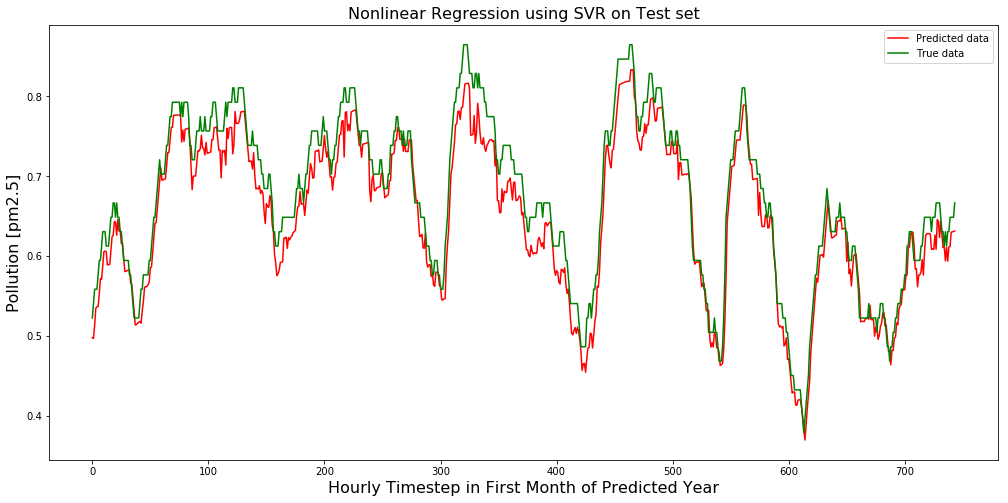

In [78]:
plot_preds_actual(y_pred[:24*31*1,], y_inv[:24*31*1,])

In [69]:
def run_test_nonlinear_reg(x, y):
    data_pred = regr.predict(x)
    y_pred = scaler.inverse_transform(data_pred.reshape(-1,1))
    y_inv = scaler.inverse_transform(y.reshape(-1,1))

    mse = mean_squared_error(y_inv, y_pred)
    rmse = np.sqrt(mse)
    print('Mean Squared Error: {:.4f}'.format(mse))
    print('Root Mean Squared Error: {:.4f}'.format(rmse))

    #Calculate R^2 (regression score function)
    #print('Variance score: %.2f' % r2_score(y, data_pred))
    print('Variance score: {:2f}'.format(r2_score(y_inv, y_pred)))
    return y_pred, y_inv

In [70]:
y_pred, y_inv = run_test_nonlinear_reg(test_X, test_y)

Mean Squared Error: 1270.5341
Root Mean Squared Error: 35.6446
Variance score: 0.787395


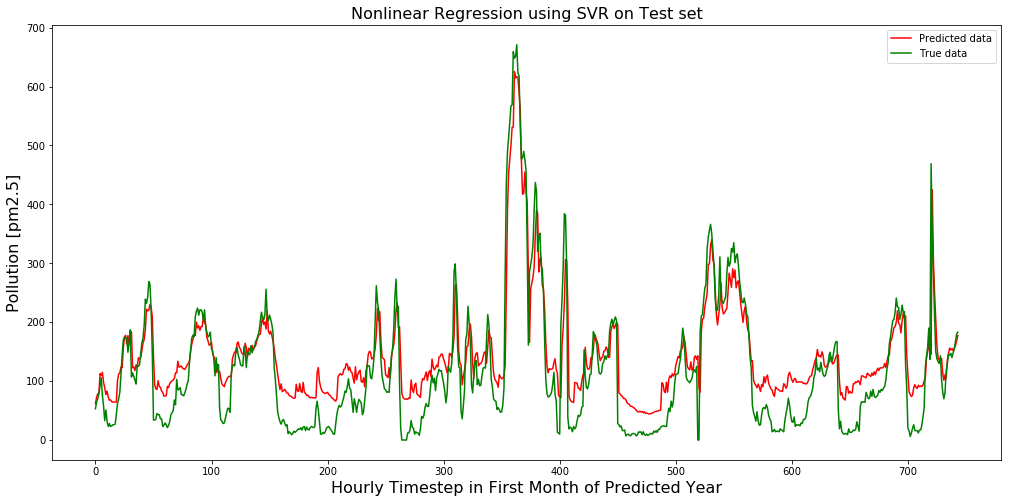

In [71]:
plot_preds_actual(y_pred[:24*31*1,], y_inv[:24*31*1,])